In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/train_submission.csv")
print("Shape :" ,df.shape)
print("Columns :", df.columns)
print("Nombre de langue cible :",len(df["Label"].unique()))
print(df.head())


Shape : (190599, 3)
Columns : Index(['Usage', 'Text', 'Label'], dtype='object')
Nombre de langue cible : 390
    Usage                                               Text Label
0  Public  َ قَالَ النَّبِيُّ ص إِنِّي أَتَعَجَّبُ مِمَّن...   hau
1  Public  Filmen forteller historien om Will Hunting  en...   nob
2  Public  An Arthrostylidium berryi in uska species han ...   wln
3  Public  Kancunarí enemigosniyquichejta munacuychej  al...   quh
4  Public  Warmeqa ama yachachichunchu hermanospa tantaku...   quh


In [3]:
df_test = pd.read_csv("../data/test_without_labels.csv")
print("Shape : ",df_test.shape)
print(df_test.head())

Shape :  (190567, 2)
     Usage                                               Text
0  Private  Hüttwilen el xe on comune del Canton Turgovia ...
1  Private  La leĝo zorgas pri kompenso de nur la plej gra...
2  Private               پک اپ پر اپنے ڈرائیور سے پہلے پہنچیں
3  Private  Mukmu  Ch'itana mukmu icha Butun nisqaqa nisqa...
4  Private  Iwe   lon ena fansoun   lupwen ra aleani än Mo...


In [4]:
# Pour 100 lignes les labels sont manquants
print(df[df.isna().any(axis=1)])

         Usage                                               Text Label
107     Public  Kòe bô jōa kú  hō͘-sū sió-chiá lâi kā góan mn̄...   NaN
803     Public  Söğütçük sī chi̍t ê tī Türkiye Aydın séng Çine...   NaN
1095    Public              Golden Valley Kūn ū khó-lêng sī kóng:   NaN
1894    Public  Tī Montégut-Lauragais ê sì-ûi ū Nogaret  Revel...   NaN
2499    Public              Soveria Simeri ùi séng lāi ê hoān-ûi.   NaN
...        ...                                                ...   ...
189637  Public  Bellebrune sī ūi-tī Hoat-kok Nord-Pas-de-Calai...   NaN
189946  Public  Bô phah-sǹg  tī sin-le̍k 10 go̍eh 29 hō ē-po͘ ...   NaN
189959  Public  Wiejki sī chi̍t ê tī Pho-lân Kiōng-hô-kok Podl...   NaN
190397  Public  Tī pún só͘-chāi sì-ûi ê tē-hng ū Valy  Veselí ...   NaN
190493  Public  Ojén sī tī Se-pan-gâ Andalucía siā-lí Málaga s...   NaN

[500 rows x 3 columns]


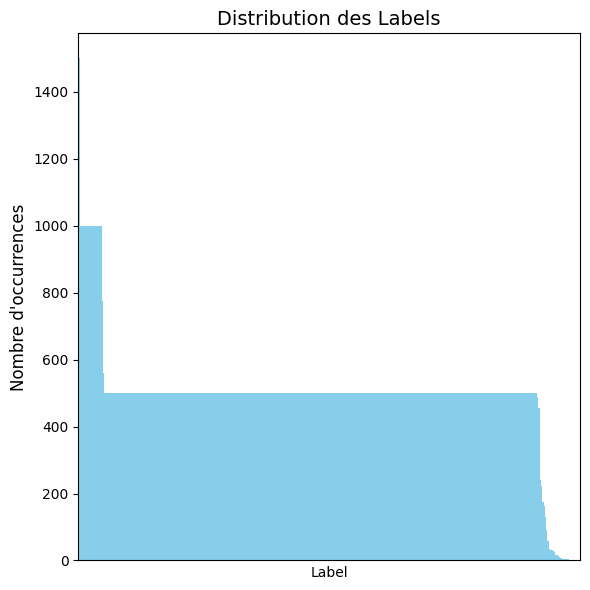

In [5]:
import matplotlib.pyplot as plt

label_counts = df["Label"].value_counts()

# Création du graphique
plt.figure(figsize=(6, 6))
label_counts.plot(kind='bar', color='skyblue', width=1)  # Ajuster la largeur des barres pour les coller

# Ajouter un titre et des labels
plt.title('Distribution des Labels', fontsize=14)
plt.ylabel('Nombre d\'occurrences', fontsize=12)

# Supprimer les noms des labels sur l'axe x et faire pivoter les ticks si nécessaire
plt.xticks([])

plt.tight_layout()
plt.show()

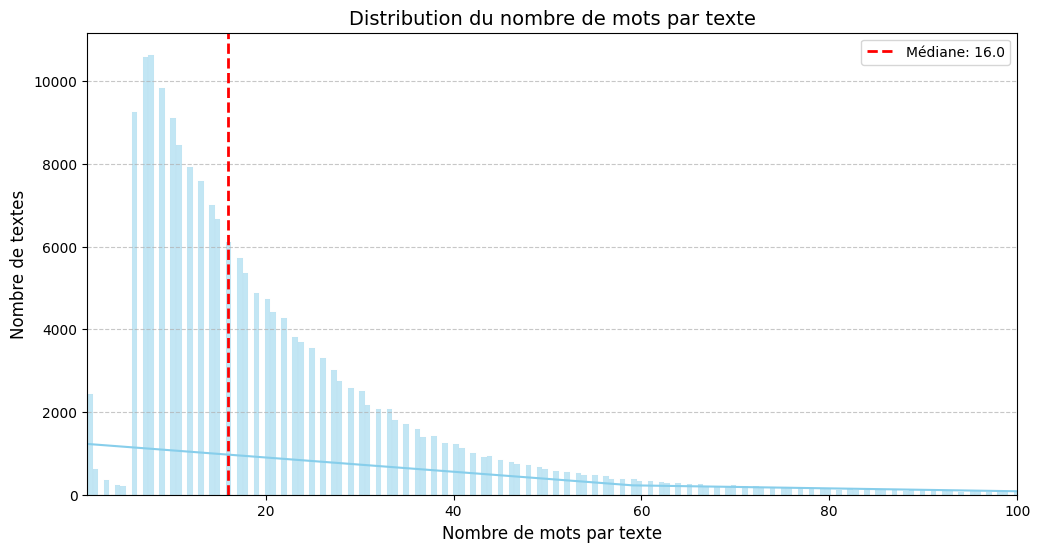

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Word_Count"] = df["Text"].apply(lambda x: len(str(x).split()))
median_word_count = df["Text"].apply(lambda x: len(str(x).split())).median()

plt.figure(figsize=(12, 6))
sns.histplot(df["Word_Count"], kde=True, color="skyblue")

plt.xlabel("Nombre de mots par texte", fontsize=12)
plt.ylabel("Nombre de textes", fontsize=12)
plt.title("Distribution du nombre de mots par texte", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(1, 100)
plt.axvline(median_word_count, color='red', linestyle='dashed', linewidth=2, label=f'Médiane: {median_word_count}')
plt.legend()
plt.show()


In [6]:
# Preprocessing : enlever les valeurs manquantes
df.dropna(inplace = True)
print("Shape :", df.shape)
print(df.head())

Shape : (38754, 4)
    ID   Usage                                               Text Label
0  136  Public  Finalment  Atena le recibe en l'acropoli d'Ate...   arg
1   62  Public  Jane Laffort fille de Joseph Laffort et d' Ang...   lat
2   74  Public  Сонзэ ялаксонзо  - Роджер Джозеф Бошкович  - у...   myv
3   40  Public  Mɛniɛ nkùɔ dìì mɔ̀nnì bɛnìtìbɛ̀ kɛ́deè  kɛ̀ Nɔ...   tbz
4   30  Public  Ka go dirisa thekniki yeo ya phetogonepiso  Le...   tsn


In [8]:
# Création du mapping label -> id
labels = sorted(df["Label"].unique().tolist())
label2id = {label: idx for idx, label in enumerate(labels)}
id2label = {idx: label for label, idx in label2id.items()}
df["label"] = df["Label"].map(label2id)

In [9]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
print("Training shape :", train_df.shape)
print("Validation shape :", val_df.shape)

Training shape : (31003, 6)
Validation shape : (7751, 6)


In [ ]:
!pip install datasets
!pip install transformers

In [11]:
from datasets import Dataset
from transformers import AutoTokenizer

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)


model_checkpoint = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(example):
    return tokenizer(example["Text"], truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Map:   0%|          | 0/31003 [00:00<?, ? examples/s]

Map:   0%|          | 0/7751 [00:00<?, ? examples/s]

In [12]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.0 MB/s eta 0:00:00


In [13]:
from evaluate import load
from transformers import (
    AutoModelForSequenceClassification,
    DataCollatorWithPadding
)

# Préparation d'un data collator qui s'occupe du padding dynamique
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

num_labels = len(labels)
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
)

accuracy_metric = load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    return accuracy 

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import (TrainingArguments, Trainer)

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-14-9fcab88dc02f>:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

In [ ]:
# 9. Prédictions sur le jeu de test
# Chargement du fichier test
test_df = pd.read_csv("./test_without_labels.csv")  # Le fichier doit contenir "ID", "Usage" et "Text"
test_dataset = Dataset.from_pandas(test_df)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Utilisation du modèle pour générer les prédictions
predictions_output = trainer.predict(test_dataset)
preds = np.argmax(predictions_output.predictions, axis=-1)

# Conversion des indices en labels textuels
test_df["Label"] = [id2label[pred] for pred in preds]

# Création du fichier de soumission avec les colonnes "ID" et "Label"
test_df[["ID", "Label"]].to_csv("submission.csv", index=False)